# Machine Learning Assignment 1 : Clustering K-means <br/>

### Dataset Link :  [Here](https://drive.google.com/open?id=1rSH9G3NfARk76APW1mcFaiHXluCFUPt2) 

<br/><br/>
Course code : CMPE-257
Group name : Seekers <br/>
Members : 
                    * Anuradha Rajashekar(012409956)
                    * Ashwini Shankar Narayan(012506910)
                    * Nidhi Jamar(010070593)
                    * Sindhu Goudru Shivanandappa Patil(010823683)
                    

The dataset consists of a list of customers and their statistics related to the credit card transactions over time. The data set contains 18 columns(features) and more than 8k rows(number of samples) of credit card user information. The business objective is to cluster these customers into groups of good customers and bad customers so that the credit card company can target specific promotions to each group of customers. 

To acheive this goal, we follow the steps below:
1. Data preparation
2. Identifying number of groups
3. Applying K-means clustering
4. Analysing the resultant clusters

In [1]:
# imports used in this ipynb file
import numpy as np # numpy to process numeric data
import pandas as pd # use of dataframes for processing data for plots and K means 
import matplotlib.pyplot as plt # plotting data
from sklearn.cluster import KMeans # kmeans class for clustering
import seaborn as sns # plotting 

###  1. Data Preparation

In this step, we read and preprocess the data to identify and remove any invalid values such as NA or ?. 

* Read and parse the csv file using the pandas Dataframe. Pandas provide a unique advantage over other libraries in preprocessing the data by providing inbuilt APIs for all the math operations on selected row/column or full dataset.
* Fill all invalid cells with median value of the column.
* In our dataset we donot have any columns with String values, hence there is no need for any transformation of data.
* There is no need to randomize the data as there is no pattern in the samples.

In [2]:
# import the data from a file and process the missing feilds
data =pd.read_csv("ML_Course_HW_1.csv")
# Check if there are any missing values in the data and fill them with medians of the same column
missing = data.isna().sum()
data = data.fillna( data.median() )
vals = data.iloc[ :, 1:].values
print(missing)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [3]:
coll = list(data.columns)
coll.remove("CUST_ID")
print("Column Name\tMIN\tMAX\tMEDIAN")
for c in coll:
    print("{}\t{}\t{}\t{}".format(c,data[c].min(),data[c].max(),data[c].median()))

Column Name	MIN	MAX	MEDIAN
BALANCE	0.0	19043.13856	873.385231
BALANCE_FREQUENCY	0.0	1.0	1.0
PURCHASES	0.0	49039.57	361.28
ONEOFF_PURCHASES	0.0	40761.25	38.0
INSTALLMENTS_PURCHASES	0.0	22500.0	89.0
CASH_ADVANCE	0.0	47137.211760000006	0.0
PURCHASES_FREQUENCY	0.0	1.0	0.5
ONEOFF_PURCHASES_FREQUENCY	0.0	1.0	0.083333
PURCHASES_INSTALLMENTS_FREQUENCY	0.0	1.0	0.166667
CASH_ADVANCE_FREQUENCY	0.0	1.5	0.0
CASH_ADVANCE_TRX	0	123	0.0
PURCHASES_TRX	0	358	7.0
CREDIT_LIMIT	50.0	30000.0	3000.0
PAYMENTS	0.0	50721.483360000006	856.901546
MINIMUM_PAYMENTS	0.019163	76406.20752000001	312.343947
PRC_FULL_PAYMENT	0.0	1.0	0.0
TENURE	6	12	12.0


###  2. Identifying number of groups

In this step, we try to see how many clusters will yeild a better interclass and intra class distance. The ideal solution should minimize the intraclass distance (i.e distance between the group samples to the centroid)  and maximize the inter class distance (i.e the distance between the centroids of different groups). This will provide a good enough seperation between clusters. A key factor in measuring this parameter is the WCSS.

*WCSS - (Within Cluster Sum of Squares) Represents the sum of squares distance of all the samples to the centroid of each cluster.<br/><br/><br/>
In the graph below, the number of clusters between which the error reduction is not so huge is the perfect candidate.

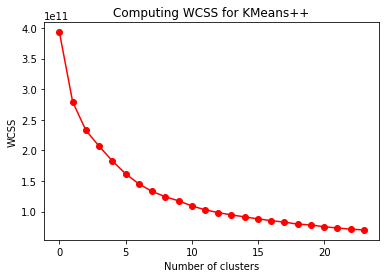

In [4]:
wcss = []
for ii in range( 1, 25 ):
    kmeans = KMeans(n_clusters=ii, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( vals )
    wcss.append( kmeans.inertia_ )
    
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

On evaluating the graph above, 4 clusters seems to be a good value.

###  3. Applying K-means clustering

Now that we have decided to group the data into 4 clusters, we use sklearn to perform K-means clustering.  Also we can plot the covariance matrix of each feature with other features in the dataset with clusters points represented in hue colors.

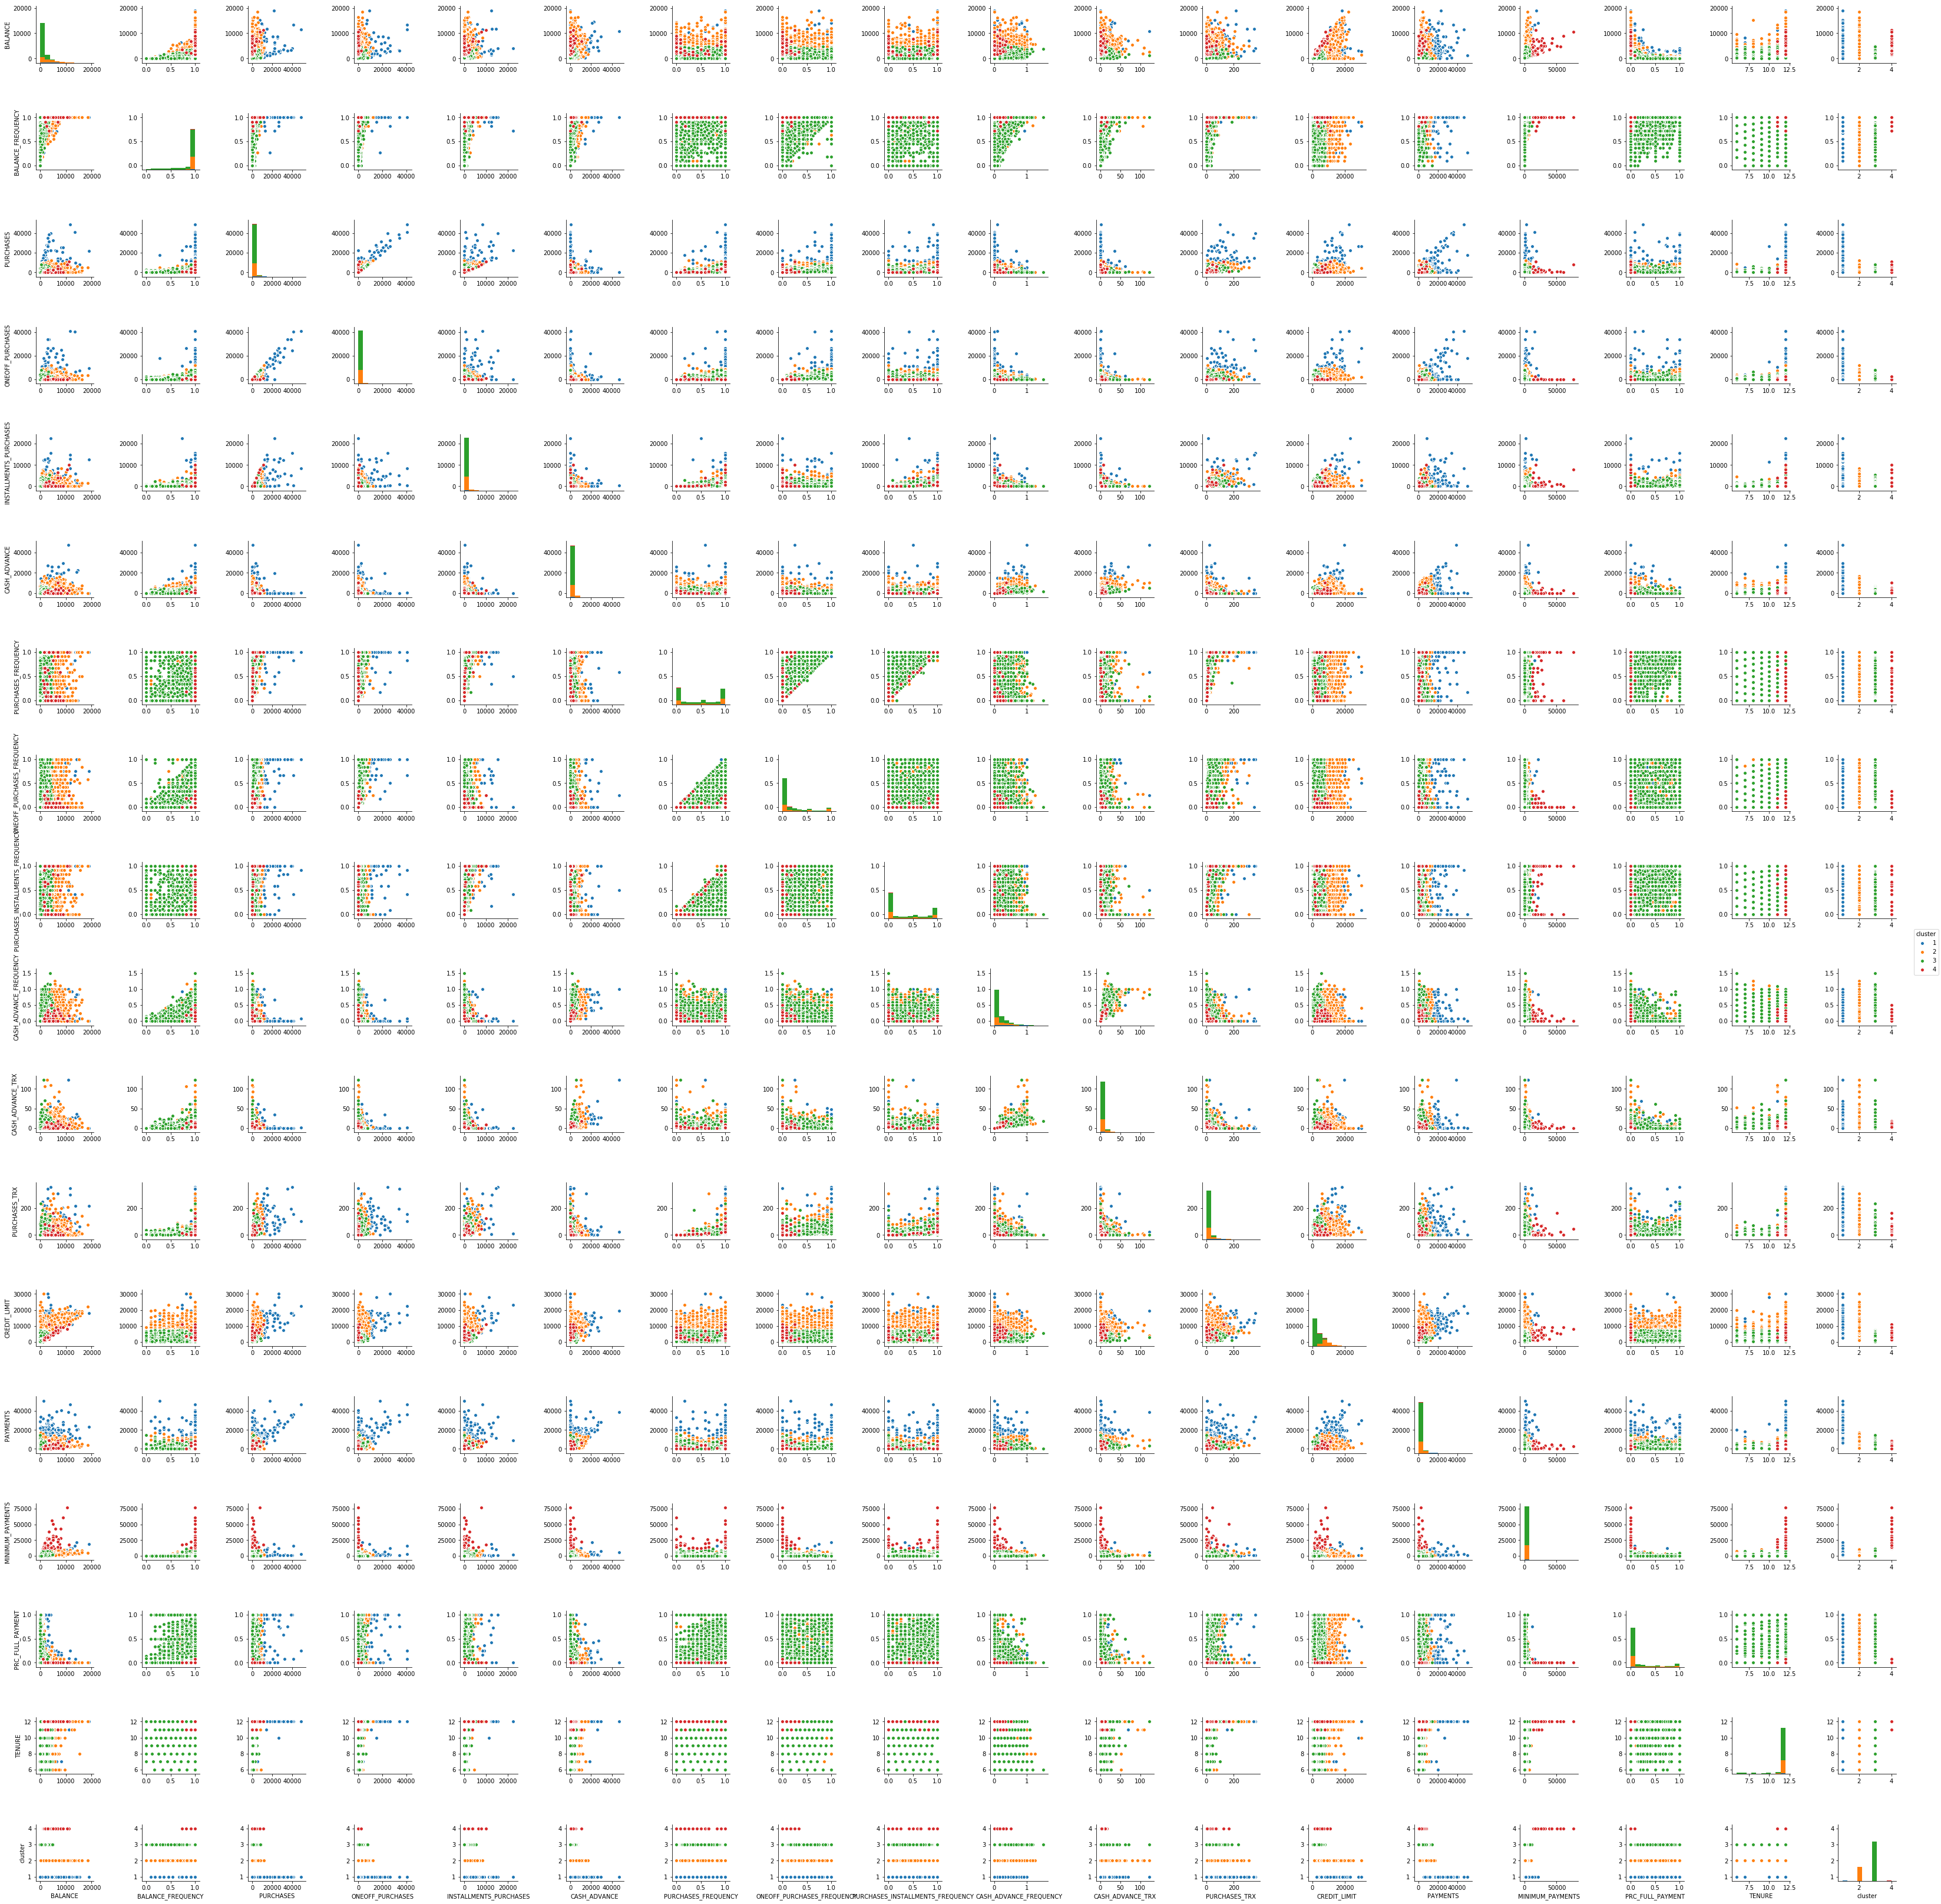

In [6]:
kmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300) 
y_pred = kmeans.fit_predict( vals )

data["cluster"] = 4-y_pred
cols = list(data.columns)
cols.remove("CUST_ID")

sns.pairplot( data[ cols ], hue="cluster")

###  4. Analysing the resultant clusters

From the above covariance graph matrix, we can clearly see correspondense between payments and purchases. These features seems to have a major role in clustering customers to different groups. To understand the groups a little better, we can plot only these features.

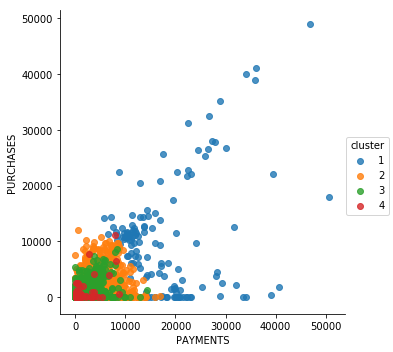

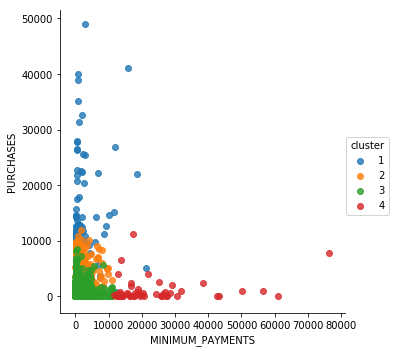

In [7]:
sns.lmplot("PAYMENTS","PURCHASES", data=data, hue='cluster', fit_reg=False)
sns.lmplot("MINIMUM_PAYMENTS","PURCHASES", data=data, hue='cluster', fit_reg=False)
plt.show()

After analysing the graphs, we can group the credit card customers into 4 categories.

1. #### Large Purchases and Large Payments (indicated in Blue) - This group of customers consists of customers making medium to large payments and/or purchases. This group is already making good amount of purchases and making large payments, hence no promotions are required.
2. #### Medium Purchases and Medium Payments (indicated in Orange) - These customers make medium purchases and medium payments. This group requires promotions to boost their purchases and that will inturn make them pay more.
3. #### Small Payments(>Minimum payments) and Small purchases (indicated in Green) - These customers make more than minimum payments and use there credit card for small purchases. This group require more promotions to make there purchases higher and payments higher.
4. #### Small Payments(Minimum payments) and Small Purchases (indicated in Red) - These customers make minimum payments and small purchases. This group only makes minimum payments hence promotions related to rewards would help them pay more and make more purchases.
